In [6]:
from sklearn import svm

# XOR의 계산 결과
xor_input = [
    #p, q, r
    [0, 0, 0],  # (0, 0) -> 0
    [0, 1, 1],  # (0, 1) -> 1
    [1, 0, 1],  # (1, 0) -> 1
    [1, 1, 0]   # (1, 1) -> 0
]

# step1) 학습을 위해 데이터(x)와 레이블(y) 분리하기 
xor_data = []
xor_label = []
for row in xor_input:
    p = row[0]
    q = row[1]
    r = row[2]
    xor_data.append([p, q])
    xor_label.append(r)


# step2) 데이터 학습시키기
mod = svm.SVC()
mod.fit(xor_data, xor_label)

# step3) 데이터 예측하기
x = xor_data
pred = mod.predict(x)
print("예측 데이터:", x)
print("예측 결과:", pred)

# step4) 결과 확인하기
ok = 0; total = 0
for idx, answer in enumerate(xor_label):
    p = pred[idx]
    if p == answer:
        ok += 1
    total += 1
    
print('정답률:', ok, '/', total, '=', ok/total)

예측 데이터: [[0, 0], [0, 1], [1, 0], [1, 1]]
예측 결과: [0 1 1 0]
정답률: 4 / 4 = 1.0


In [7]:
# pandas를 이용하여 위의 코드를 쉽게 구현하기
import pandas as pd
from sklearn import svm, metrics

# XOR 연산
xor_input = [
    #p, q, r
    [0, 0, 0],  # (0, 0) -> 0
    [0, 1, 1],  # (0, 1) -> 1
    [1, 0, 1],  # (1, 0) -> 1
    [1, 1, 0]   # (1, 1) -> 0
]

# step1) x, y data
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df[[0, 1]]
xor_label = xor_df[2]

# step2) 데이터 학습과 예측하기
mod = svm.SVC()
mod.fit(xor_data, xor_label)
pred = mod.predict(xor_data)

# step3) 정답률 구하기
ac_score = metrics.accuracy_score(xor_label, pred)
print('정답률:', ac_score)

정답률: 1.0


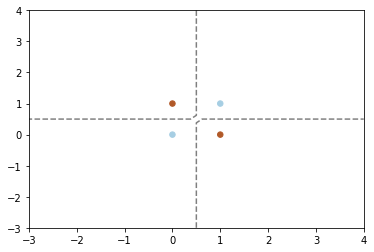

In [34]:
# 모델 시각화1
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(xor_data.iloc[:,0], xor_data.iloc[:,1], c=xor_label, s=30, cmap=plt.cm.Paired)


# 비선형 svm (왜냐하면 SVC의 kernel default가 'rbf'임)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mod.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5, linestyles='--')
# 지지벡터(Support Vector) 표현
#ax.scatter(mod.support_vectors_[:,0], mod.support_vectors_[:,1], s=60, facecolors='r')
plt.show();

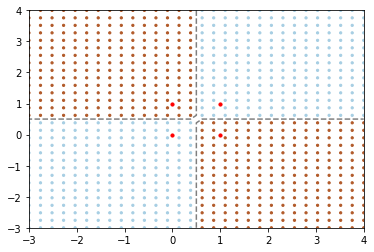

In [45]:
# 모델 시각화2
# -- 점 찍기
# -- decision boundary
# -- 점 색깔별로 예측 결과 보여주기

preds = mod.predict(xy)
plt.scatter(xy[:,0], xy[:,1], c=preds, s=5, cmap=plt.cm.Paired)
plt.scatter(xor_data.iloc[:,0], xor_data.iloc[:,1], c='red', s=10)
ax = plt.gca()
ax.set_xlim(-3, 4)
ax.set_ylim(-3, 4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mod.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5, linestyles='--')
# 지지벡터(Support Vector) 표현
#ax.scatter(mod.support_vectors_[:,0], mod.support_vectors_[:,1], s=60, facecolors='r')
plt.show();

모델 저장 및 불러오기
1. pickle 사용
2. sklearn joblib 사용

In [33]:
# pickle)
import pickle

# 저장
with open('./model/xor_model_svm.pkl', 'wb') as f:
    pickle.dump(mod, f)    

In [35]:
# 불러오기
with open('./model/xor_model_svm.pkl', 'rb') as f:
    model = pickle.load(f)
    
# 문제
x_test = [[1, 1]]

# 모델 예측
y_pred = model.predict(x_test)
print(y_pred)

[0]


In [41]:
# sklearn)
from sklearn.externals import joblib

# 저장
joblib.dump(mod, './model/xor_model_svm2.pkl')

['xor_model_svm2.pkl']

In [44]:
from sklearn.externals import joblib

model = joblib.load('./model/xor_model_svm2.pkl') 

# 문제
x_test = [[1, 1]]

# 모델 예측
y_predict = model.predict(x_test)
print(y_predict[0]) 

0


# 연습문제

AND 연산 모델 작성

In [48]:
# pandas를 이용하여 위의 코드를 쉽게 구현하기
import pandas as pd
from sklearn import svm, metrics

# AND 연산
and_input = [
    #p, q, r
    [0, 0, 0],  # (0, 0) -> 0
    [0, 1, 0],  # (0, 1) -> 1
    [1, 0, 1],  # (1, 0) -> 1
    [1, 1, 1]   # (1, 1) -> 0
]

# step1) x, y data
and_df = pd.DataFrame(and_input)
and_data = and_df[[0, 1]]
and_label = and_df[2]

# step2) 데이터 학습과 예측하기
mod = svm.SVC(kernel='linear')
mod.fit(and_data, and_label)
pred = mod.predict(and_data)
print("예측 데이터:", x)
print("예측 결과:", pred)

# step3) 정답률 구하기
ac_score = metrics.accuracy_score(and_label, pred)
print('정답률:', ac_score)

예측 데이터: [[0, 0], [0, 1], [1, 0], [1, 1]]
예측 결과: [0 0 1 1]
정답률: 1.0
